In [12]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Math

sp.init_printing()

Solve the following optimization problem
$$
\begin{alignat*}{2}
    & \text{minimize: } && xy \\
    & \text{subject to: } && 
        \begin{aligned}[t]
            x+2y &\leq 8\\
            \dfrac{x^2}{16}+1 &\leq y \\
            x &\geq 0 \\
            0 \leq y &\leq 3
        \end{aligned}
\end{alignat*}
$$   

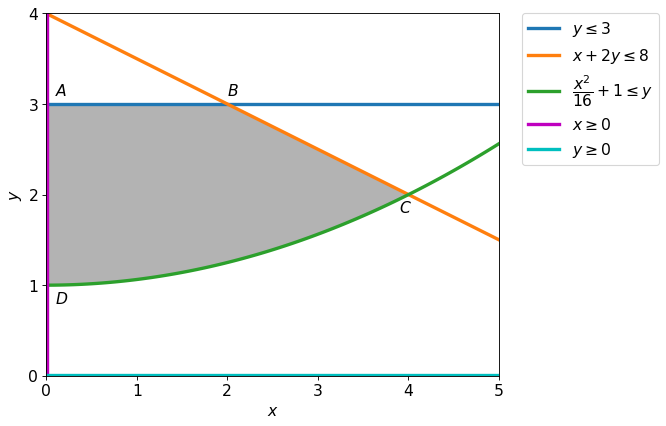

In [13]:
%matplotlib inline
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 14})

# plot the feasible region
d = np.linspace(0,4,300)
x,y = np.meshgrid(d,d)
plt.imshow( ((y<=3) & (x+2*y<=8) & (x**2/16+1<=y) & (x>=0)).astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);

# plot the lines defining the constraints
x = np.linspace(0, 5, 100)
# y >= 2
y1 = (x*0) + 3
# 2y <= 25 - x
y2 = 4-x/2
# 4y >= 2x - 8 
y3 = x**2/16+1
# y <= 2x - 5 
y4 = x*0+0.01

# Annotation
plt.annotate('$A$', (0.1, 3.1))
plt.annotate('$B$', (2, 3.1))
plt.annotate('$C$', (3.9, 1.8))
plt.annotate('$D$', (0.1, 0.8))

# Make plot
plt.plot(x, y1, label=r'$y\leq3$', linewidth=3)
plt.plot(x, y2, label=r'$x+2y\leq8$', linewidth=3)
plt.plot(x, y3, label=r'$\dfrac{x^2}{16}+1\leq y$', linewidth=3)
plt.axvline(0.01, 0, 4, label=r'$x\geq0$', color='m', linewidth=3)
plt.plot(x, y4, label=r'$y\geq0$', color='c', linewidth=3)
plt.xlim(0,5)
plt.ylim(0,4)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.yticks(range(0,5))
plt.show()

We can see that the constraint $y\geq 0$ is not active. So we don't have to include this constraint in our solution.

### Case I

First we search for critical points in the interior of the region.

In [40]:
x, y = sp.var('x,y',real=True);
f = x*y
g1 = 3 - y
g2 = 8 - x - 2*y
g3 = y - x**2/16 - 1
g4 = x
display(Math(
rf"""
f = {sp.latex(f)}\\
g_1 = {sp.latex(g1)}\\
g_2 = {sp.latex(g2)}\\
g_3 = {sp.latex(g3)}\\
g_4 = {sp.latex(g4)}
"""))

<IPython.core.display.Math object>

In [36]:
lam1 = sp.symbols('lambda_1', real = True)
lam2 = sp.symbols('lambda_2', real = True)
lam3 = sp.symbols('lambda_3', real = True)
lam4 = sp.symbols('lambda_4', real = True)
L = f + lam1 * g1 + lam2 * g2 + lam3 * g3 + lam4 * g4
display(Markdown(rf"The lagrangian $L={sp.latex(L)}$"))

The lagrangian $L=\lambda_{1} \left(- y + 3\right) + \lambda_{2} \left(- x - 2 y + 8\right) + \lambda_{3} \left(- \frac{x^{2}}{16} + y - 1\right) + \lambda_{4} x + x y$

In [37]:
gradL = [sp.diff(L,c) for c in [x,y]] # gradient of Lagrangian w.r.t. (x,y)
KKT_eqs = gradL + [lam1 * g1, lam2 * g2, lam3 * g3, lam4 * g4]

expr = ""
for i in KKT_eqs:
    expr += sp.latex(i) + "= 0 \\\\"
    
display(Math(expr))

<IPython.core.display.Math object>

In [38]:
stationary_points = sp.solve(KKT_eqs, [x, y, lam1, lam2, lam3, lam4], dict=True) # solve the KKT equations
stationary_points 

table = f"|$x$|$y$|${sp.latex(lam1)}$|${sp.latex(lam2)}$|${sp.latex(lam3)}$|${sp.latex(lam4)}$|Obj|\n"\
       +"|---|---|---|---|---|---|---|\n"
for i in stationary_points:
    table += "|$" + str(i[x]) \
          + "$|$" + str(i[y]) \
          + "$|$" + str(i[lam1]) \
          + "$|$" + str(i[lam2]) \
          + "$|$" + str(i[lam3]) \
          + "$|$" + str(i[lam4]) \
          + "$|$" + str(f.subs(i)) \
          + "$|\n"

display(Markdown(table))

|$x$|$y$|$\lambda_{1}$|$\lambda_{2}$|$\lambda_{3}$|$\lambda_{4}$|Obj|
|---|---|---|---|---|---|---|
|$0$|$4$|$0$|$0$|$0$|$-4$|$0$|
|$0$|$3$|$0$|$0$|$0$|$-3$|$0$|
|$0$|$1$|$0$|$0$|$0$|$-1$|$0$|
|$0$|$0$|$0$|$0$|$0$|$0$|$0$|
